In [1]:
import feather
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
train = feather.read_dataframe('../data/interim/train.ftr')
test = feather.read_dataframe('../data/interim/test.ftr')
train.shape, test.shape

((903653, 55), (804684, 53))

In [3]:
totals_columns_train = [col for col in train.columns if "totals" in col]
train[totals_columns_train].dtypes

totals.bounces               object
totals.hits                  object
totals.newVisits             object
totals.pageviews             object
totals.transactionRevenue    object
totals.visits                object
dtype: object

In [4]:
totals_columns_test = copy.deepcopy(totals_columns_train)
totals_columns_test.remove('totals.transactionRevenue')
test[totals_columns_test].dtypes

totals.bounces      object
totals.hits         object
totals.newVisits    object
totals.pageviews    object
totals.visits       object
dtype: object

### 欠損値

In [5]:
def find_missing(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return df.loc[~(df['Total']==0)]

miss_train = find_missing(train[totals_columns_train])
miss_test = find_missing(test[totals_columns_test])
display(miss_train)
display(miss_test)

,Total,Percent
totals.transactionRevenue,892138,98.725728
totals.bounces,453023,50.132407
totals.newVisits,200593,22.198012
totals.pageviews,100,0.011066


,Total,Percent
totals.bounces,383736,47.687788
totals.newVisits,200314,24.893499
totals.pageviews,139,0.017274


### 各カラムの中身を簡易集計

In [6]:
def aggregates_train_test(colname):
    summary_train = train.groupby(colname).count()['date'].sort_values(ascending=False)
    summary_test = test.groupby(colname).count()['date'].sort_values(ascending=False)
    summary_train.name = 'train'
    summary_test.name = 'test'
    result = pd.concat([summary_train, summary_test], axis=1, sort=True, join='outer').sort_values('train', ascending=False)
    return result

In [7]:
for col in totals_columns_test:
    print(col)
    display(aggregates_train_test(col))

totals.bounces


,train,test
totals.bounces,,
1,450630,420948


totals.hits


,train,test
1,446754.0,417310.0
2,137952.0,99547.0
3,70402.0,64033.0
4,42444.0,38431.0
5,30939.0,32748.0
6,23918.0,22680.0
7,19518.0,18619.0
8,15484.0,14233.0
9,12959.0,12040.0
10,10640.0,9666.0


totals.newVisits


,train,test
totals.newVisits,,
1,703060,604370


totals.pageviews


,train,test
1,452522.0,423806.0
2,143770.0,106024.0
3,73835.0,69061.0
4,45192.0,41474.0
5,33411.0,31301.0
6,24688.0,23033.0
7,19476.0,18275.0
8,15272.0,14314.0
9,12585.0,11568.0
10,10104.0,9124.0


totals.visits


,train,test
totals.visits,,
1,903653,804684


### totals.bouncesについて

- 合計直帰数（便宜上の値）。セッション開始後にすぐに離脱した場合、値は「1」となります。そうでない場合は「null」です。

In [9]:
train['totals.bounces'].unique(), test['totals.bounces'].unique()

(array(['1', None], dtype=object), array([None, '1'], dtype=object))

In [13]:
num_1_train = train["totals.bounces"].fillna(0).astype(int).sum()
num_1_test = test["totals.bounces"].fillna(0).astype(int).sum()
print('number of 1 in train set:', num_1_train, 'ratio:', num_1_train/len(train))
print('number of 1 in train set:', num_1_test, 'ratio:', num_1_test/len(train))

number of 1 in train set: 450630 ratio: 0.49867592980934056
number of 1 in train set: 420948 ratio: 0.46582925082968796


### totals.hitsについて

- セッション中の合計ヒット数。
- ヒット数とは、Webサーバーへのリクエスト回数。  
https://tech.nikkeibp.co.jp/it/article/COLUMN/20060228/231305/

In [15]:
train['hits'] = train['totals.hits'].astype(int)
test['hits'] = test['totals.hits'].astype(int)

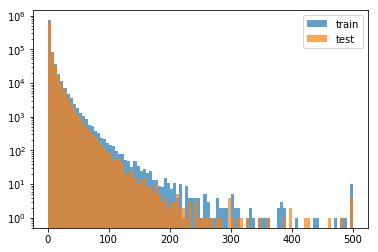

In [23]:
plt.hist(train['hits'], bins=100, alpha=0.7, label="train")
plt.hist(test['hits'], bins=100, alpha=0.7, label="test")
plt.yscale("log")
plt.legend()
plt.show()

- binningを試してみる。
- qcut()やcut()を使う。

500 500


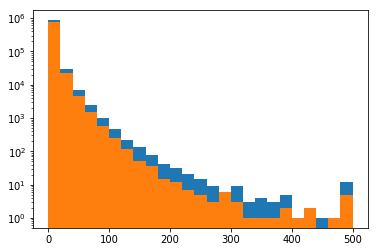

In [45]:
print(train['hits'].max(), test["hits"].max())
n, bins, _ = plt.hist(train['hits'], bins=np.arange(0, 501, 20))
n, bins, _ = plt.hist(test['hits'], bins=np.arange(0, 501, 20))
plt.yscale("log")
plt.show()

### totals.newVisitsについて

- セッション内の新規ユーザーの合計数（便宜上の値）。最初の訪問の場合は「1」、そうでない場合は「null」となります。
- newVisitsが1となる時は、visitNumberも1となる。

In [42]:
train.groupby(['totals.newVisits']).count()['date'], train.groupby(['totals.newVisits', 'visitNumber']).count()['date']

(totals.newVisits
 1    703060
 Name: date, dtype: int64, totals.newVisits  visitNumber
 1                 1              703060
 Name: date, dtype: int64)

In [43]:
test.groupby(['totals.newVisits']).count()['date'], test.groupby(['totals.newVisits', 'visitNumber']).count()['date']

(totals.newVisits
 1    604370
 Name: date, dtype: int64, totals.newVisits  visitNumber
 1                 1              604370
 Name: date, dtype: int64)

### totals.pageviewsについて

- セッション中の合計ページビュー数。
- 表示されたページ数。（ヒット数とは多少意味合いが異なる）

In [50]:
train['totals.pageviews'] = train['totals.pageviews'].astype(float)
test['totals.pageviews'] = test['totals.pageviews'].astype(float)
print("number of NaN in train set:", train['totals.pageviews'].isnull().sum())
print("number of NaN in test set:", test['totals.pageviews'].isnull().sum())

number of NaN in train set: 100
number of NaN in test set: 139


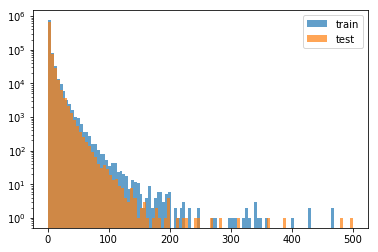

In [48]:
plt.hist(train['totals.pageviews'].dropna(), bins=100, alpha=0.7, label="train")
plt.hist(test['totals.pageviews'].dropna(), bins=100, alpha=0.7, label="test")
plt.yscale("log")
plt.legend()
plt.show()

### totals.hits と totals.pageviews

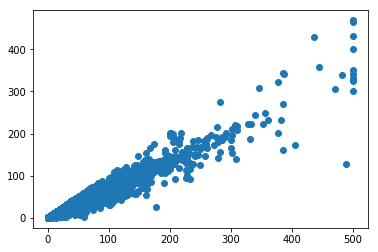

In [51]:
plt.scatter(train['totals.hits'].fillna(0).astype(int), train['totals.pageviews'].fillna(0).astype(int))
plt.show()

- hitsとpageviewの比率で、購入者かどうかわかるみたい。  
https://www.kaggle.com/c/ga-customer-revenue-prediction/discussion/66774
- hitsには欠損がないが、pageviewには欠損がある。
- pageviewが欠損である場合にも、hitsの値は含まれている。
- 以上から、比率を計算する際は、hits / (pageviews+1) が妥当だと考える。

In [18]:
display(train[train['totals.pageviews'].isnull()].groupby('totals.hits').size())
display(test[test['totals.pageviews'].isnull()].groupby('totals.hits').size())

totals.hits
1     74
13     1
2     14
3      4
4      3
5      1
6      2
7      1
dtype: int64

totals.hits
1     87
17     1
2     33
3     12
4      4
5      1
9      1
dtype: int64

In [21]:
train['hits_pageviews_ratio'] = train['totals.hits'].astype(int) / (train['totals.pageviews'].fillna(0).astype(int) + 1)
train[['hits_pageviews_ratio', 'totals.hits', 'totals.pageviews']].tail()

,hits_pageviews_ratio,totals.hits,totals.pageviews
903648,1.062500,17,15
903649,1.285714,18,13
903650,1.090909,24,21
903651,1.043478,24,22
903652,0.968750,31,31
